In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from collections import Counter

In [9]:
experiment2_dataset = pd.read_csv('Experiment_2_Data.csv')

In [10]:
experiment2_dataset.head()

,Experiment,Experiment Index,Model,Sample Size,R²,MAE,RMSE,Accuracy,SHAP Match Percentage,Top SHAP Features
0,Auto Premium,1,Random Forest,100,0.524816,213.904500,292.577005,0.525554,80.0,"{'Age': 196.59853049801686, 'Annual kilometers..."
1,Auto Premium,2,XGBoost,100,0.567310,154.019069,279.188673,0.576480,80.0,"{'Age': 181.50418, 'Annual kilometers': 158.15..."
2,Auto Premium,3,Gradient Boosting,100,0.667429,165.265832,244.766104,0.667874,80.0,"{'Age': 199.23890279989655, 'Annual kilometers..."
3,Auto Premium,4,CatBoost,100,0.415900,203.638165,324.378903,0.436921,80.0,"{'Age': 128.56405825681992, 'Annual kilometers..."
4,Auto Premium,5,HistGradientBoosting,100,0.153045,313.934816,390.606372,0.153191,60.0,"{'Age': 178.3608582884694, 'Business Use': 52...."


In [19]:
experiment2_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59791 entries, 0 to 59790
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Experiment             59791 non-null  object 
 1   Experiment Index       59791 non-null  int64  
 2   Model                  59791 non-null  object 
 3   Sample Size            59791 non-null  int64  
 4   R²                     59791 non-null  float64
 5   MAE                    59791 non-null  float64
 6   RMSE                   59791 non-null  float64
 7   Accuracy               59791 non-null  float64
 8   SHAP Match Percentage  59791 non-null  float64
 9   Top SHAP Features      59791 non-null  object 
 10  Composite Score        59791 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.0+ MB


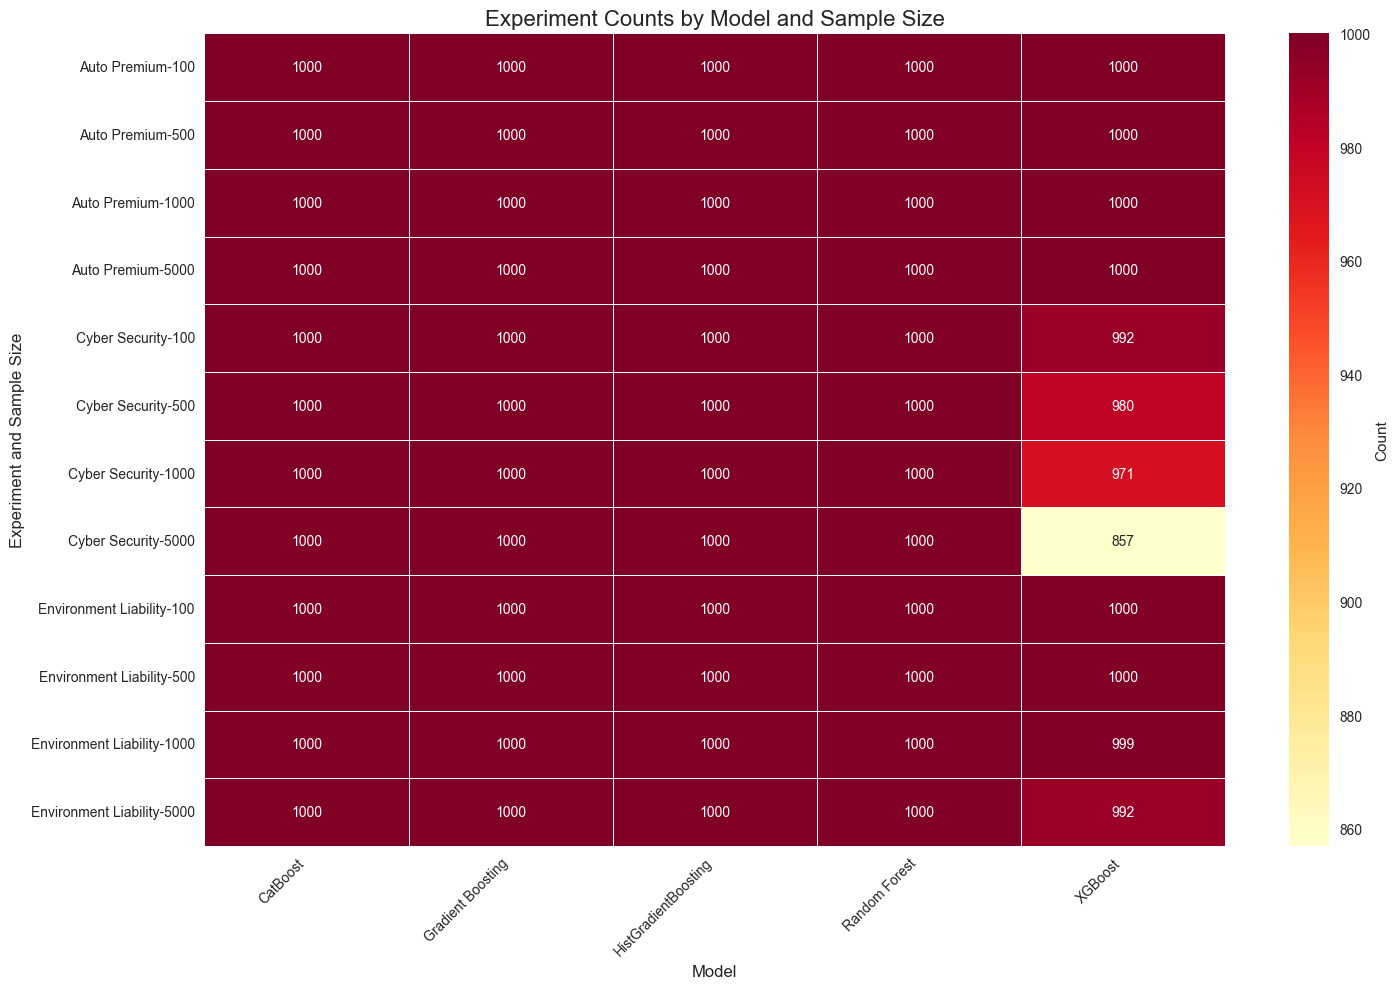

In [24]:
# Count the combinations
combination_counts = Counter(zip(experiment2_dataset["Experiment"], experiment2_dataset["Model"], experiment2_dataset["Sample Size"]))


# Assuming you have already created experiment2_dataset and combination_counts
# If not, you would create them like this:
# experiment2_dataset = pd.DataFrame(...)
# combination_counts = Counter(zip(experiment2_dataset["Experiment"], experiment2_dataset["Model"], experiment2_dataset["Sample Size"]))

# Convert the Counter object to a DataFrame
df = pd.DataFrame([(exp, model, sample_size, count) 
                   for (exp, model, sample_size), count in combination_counts.items()],
                  columns=['Experiment', 'Model', 'Sample Size', 'Count'])

# Pivot the data for the heatmap
pivot_df = df.pivot_table(values='Count', index=['Experiment', 'Sample Size'], columns='Model', aggfunc='first')

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(pivot_df, annot=True, fmt='g', cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Count'})

# Customize the plot
plt.title('Experiment Counts by Model and Sample Size', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Experiment and Sample Size', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


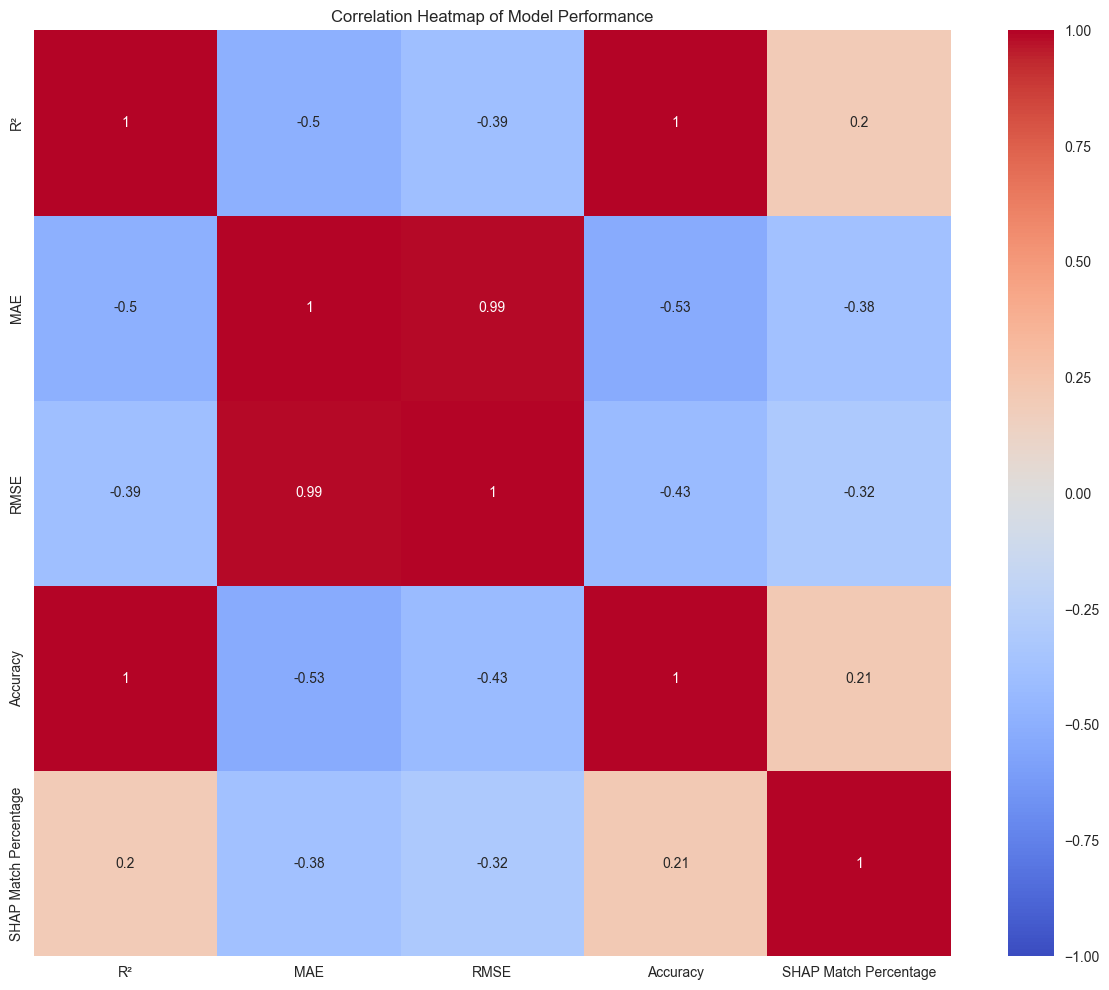

In [25]:
# Select numerical columns for correlation analysis
numeric_columns = ['R²', 'MAE', 'RMSE', 'Accuracy', 'SHAP Match Percentage']
# Calculate the correlation matrix
correlation_matrix = experiment2_dataset[numeric_columns].corr()
# Analyze correlations between different models
model_correlations = experiment2_dataset.groupby('Model')[numeric_columns].mean().corr()
plt.figure(figsize=(12, 10))
sns.heatmap(model_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Model Performance')
plt.tight_layout()
plt.show()
plt.close()

/var/folders/ch/cnzx1kvd1d9_f94xydxjcr3m0000gq/T/ipykernel_23319/1607872695.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


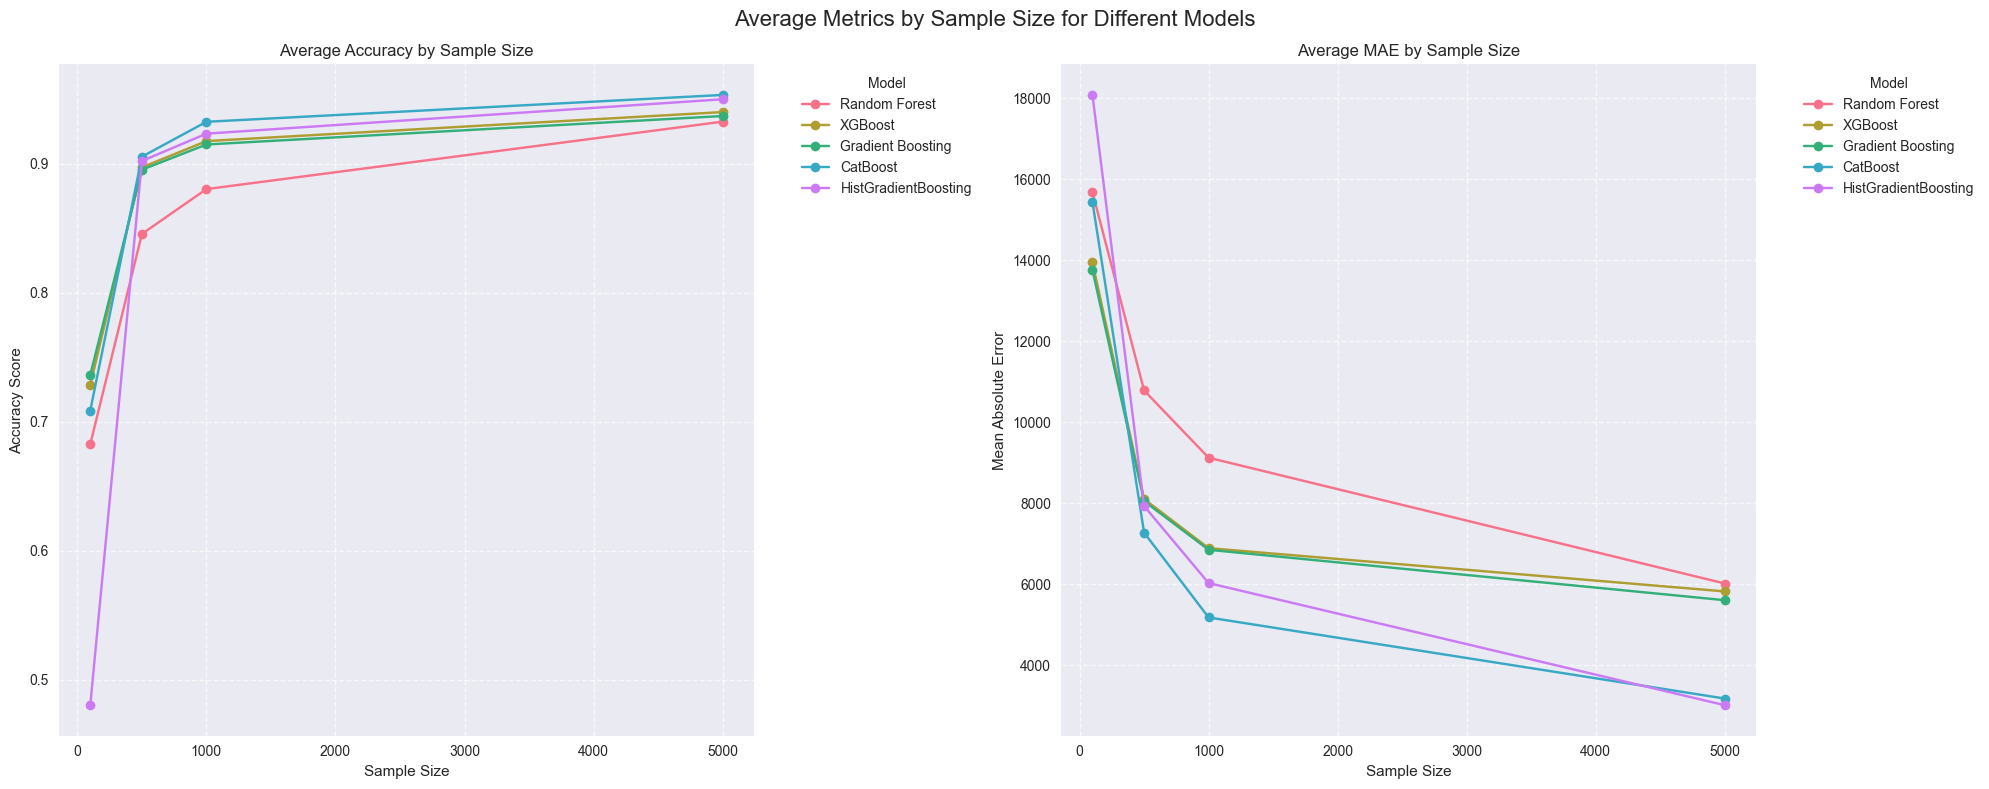


Average Accuracy for each model at different sample sizes:
Model        CatBoost  Gradient Boosting  HistGradientBoosting  Random Forest  \
Sample Size                                                                     
100          0.708655           0.736337              0.480133       0.682483   
500          0.905532           0.895405              0.902196       0.845602   
1000         0.932585           0.914988              0.923386       0.880388   
5000         0.953413           0.937066              0.950048       0.932689   

Model         XGBoost  
Sample Size            
100          0.728394  
500          0.897217  
1000         0.917623  
5000         0.940117  

Average MAE for each model at different sample sizes:
Model            CatBoost  Gradient Boosting  HistGradientBoosting  \
Sample Size                                                          
100          15435.311100       13757.335766          18080.987227   
500           7270.213731        8048.184158

In [12]:
# List of models and metrics to plot
models = experiment2_dataset['Model'].unique()
metrics = ['Accuracy', 'MAE']  # We'll plot R² and MAE

# Set up the plot style
plt.style.use('seaborn')
colors = sns.color_palette("husl", n_colors=len(models))

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Average Metrics by Sample Size for Different Models', fontsize=16)

# Function to plot a metric
def plot_metric(ax, metric, ylabel):
    for model, color in zip(models, colors):
        model_data = experiment2_dataset[experiment2_dataset['Model'] == model]
        avg_metric = model_data.groupby('Sample Size')[metric].mean()
        ax.plot(avg_metric.index, avg_metric.values, marker='o', linestyle='-', label=model, color=color)
    
    ax.set_xlabel('Sample Size')
    ax.set_ylabel(ylabel)
    ax.set_title(f'Average {metric} by Sample Size')
    ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.7)

# Plot R² on the left subplot
plot_metric(ax1, 'Accuracy', 'Accuracy Score')

# Plot MAE on the right subplot
plot_metric(ax2, 'MAE', 'Mean Absolute Error')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Optional: Print average metrics for each model at different sample sizes
for metric in metrics:
    print(f"\nAverage {metric} for each model at different sample sizes:")
    pivot_table = experiment2_dataset.pivot_table(values=metric, index='Sample Size', columns='Model', aggfunc='mean')
    print(pivot_table)

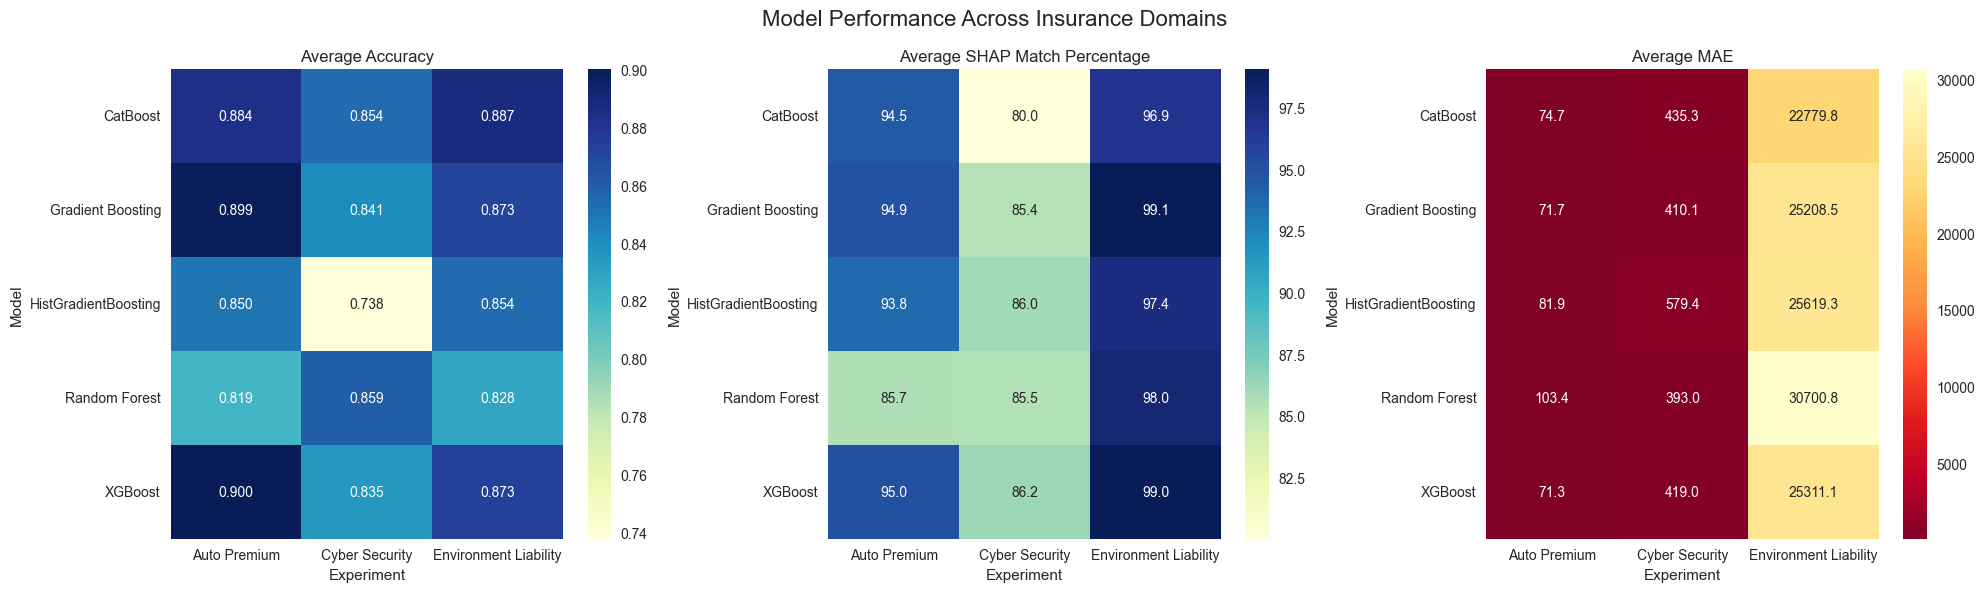

Accuracy Summary:
Experiment  Auto Premium  Cyber Security  Environment Liability
count           5.000000        5.000000               5.000000
mean            0.870221        0.825447               0.863049
std             0.035304        0.049877               0.022706
min             0.818661        0.737942               0.828183
25%             0.849614        0.834925               0.854267
50%             0.883755        0.841020               0.872826
75%             0.899001        0.854323               0.872911
max             0.900073        0.859028               0.887060

SHAP Match Percentage Summary:
Experiment  Auto Premium  Cyber Security  Environment Liability
count            5.00000        5.000000               5.000000
mean            92.76600       84.623211              98.066700
std              4.00863        2.592537               0.973267
min             85.65000       80.025000              96.889286
25%             93.76000       85.415000              

In [16]:
# If it's not, replace 'df' with the actual name of your DataFrame

# Calculate average metrics for each model and source
accuracy_pivot = experiment2_dataset.pivot_table(values='Accuracy', index='Model', columns='Experiment', aggfunc='mean')
shap_pivot = experiment2_dataset.pivot_table(values='SHAP Match Percentage', index='Model', columns='Experiment', aggfunc='mean')
mae_pivot = experiment2_dataset.pivot_table(values='MAE', index='Model', columns='Experiment', aggfunc='mean')

# Set up the plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model Performance Across Insurance Domains', fontsize=16)

# Accuracy Heatmap
sns.heatmap(accuracy_pivot, annot=True, cmap="YlGnBu", fmt=".3f", ax=ax1)
ax1.set_title('Average Accuracy')

# SHAP Match Percentage Heatmap
sns.heatmap(shap_pivot, annot=True, cmap="YlGnBu", fmt=".1f", ax=ax2)
ax2.set_title('Average SHAP Match Percentage')

# MAE Heatmap
sns.heatmap(mae_pivot, annot=True, cmap="YlOrRd_r", fmt=".1f", ax=ax3)
ax3.set_title('Average MAE')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig('model_performance_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("Accuracy Summary:")
print(accuracy_pivot.describe())
print("\nSHAP Match Percentage Summary:")
print(shap_pivot.describe())
print("\nMAE Summary:")
print(mae_pivot.describe())

In [17]:
# Function to calculate composite score with more weight on SHAP
def calculate_composite_score(row, weights):
    r2_score = row['Accuracy'] * weights['Accuracy']
    mae_score = (1 - row['MAE'] / experiment2_dataset['MAE'].max()) * weights['MAE']  # Normalize and invert MAE
    shap_score = row['SHAP Match Percentage'] / 100 * weights['SHAP']  # Normalize SHAP
    return r2_score + mae_score + shap_score

# Set weights with more emphasis on SHAP
weights = {
    'Accuracy': 0.3,
    'MAE': 0.25,
    'SHAP': 0.5  # Increased weight for SHAP
}

# Calculate new composite score
experiment2_dataset['Composite Score'] = experiment2_dataset.apply(calculate_composite_score, axis=1, weights=weights)

In [17]:
# Group by Model and calculate the mean for Composite Score, Accuracy, and MAE
average_metrics = experiment2_dataset.groupby('Model').agg({
    'Composite Score': 'mean',
    'Accuracy': 'mean',
    'MAE': 'mean'
}).reset_index()

# Rename columns for clarity
average_metrics.columns = ['Model', 'Avg Composite Score', 'Avg Accuracy', 'Avg MAE']

In [18]:
average_metrics

,Model,Avg Composite Score,Avg Accuracy,Avg MAE
0,CatBoost,0.945386,0.875046,7763.243772
1,Gradient Boosting,0.955501,0.870949,8563.435597
2,HistGradientBoosting,0.934043,0.813941,8760.184673
3,Random Forest,0.923082,0.835291,10399.070488
4,XGBoost,0.956749,0.869883,8726.496455


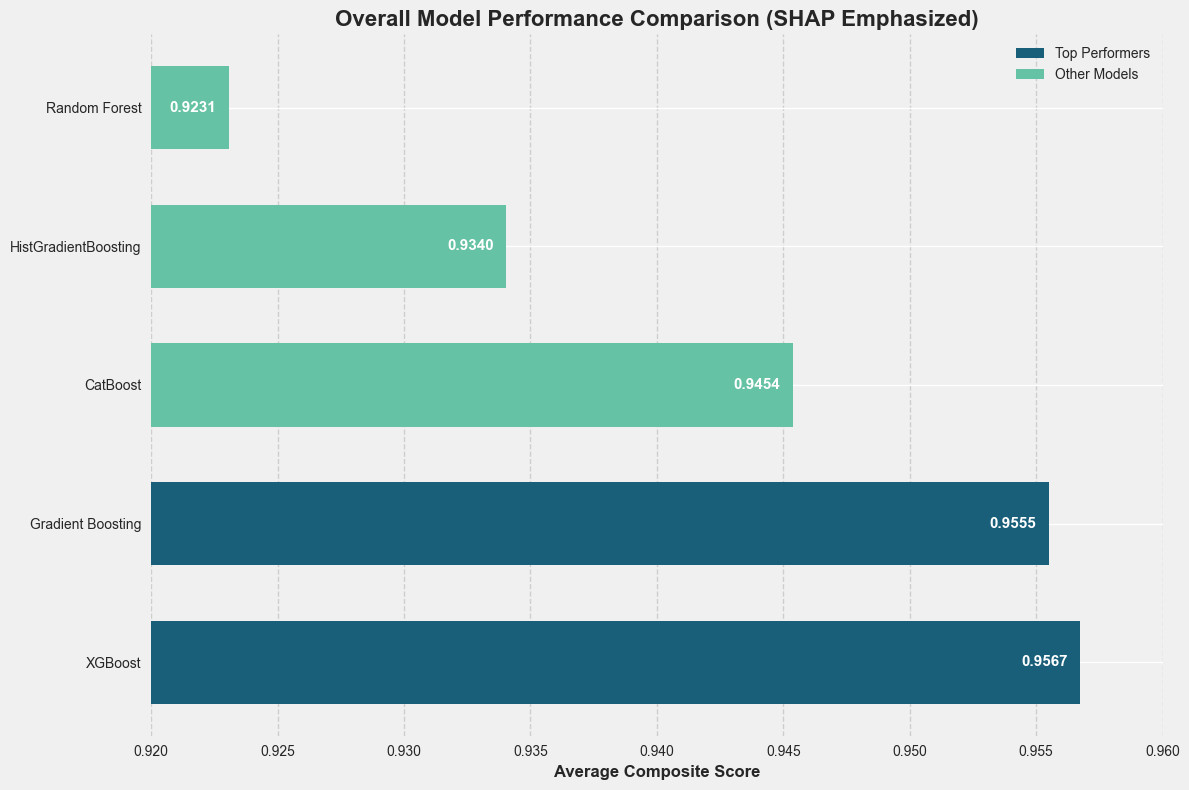

Performance differences from the top model:
Gradient Boosting: 0.0012
CatBoost: 0.0114
HistGradientBoosting: 0.0227
Random Forest: 0.0337


In [19]:
# Data
models = average_metrics['Model']
scores = average_metrics['Avg Composite Score']

# Sort data in descending order
sorted_data = sorted(zip(models, scores), key=lambda x: x[1], reverse=True)
models, scores = zip(*sorted_data)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for top performers and other models
top_color = '#1a5f7a'
other_color = '#66c2a4'
bar_colors = [top_color if i < 2 else other_color for i in range(len(models))]

# Plot bars
bars = ax.barh(models, scores, height=0.6, color=bar_colors)

# Customize the plot
ax.set_xlim(0.92, 0.96)  # Adjust x-axis to focus on the score range
ax.set_xlabel('Average Composite Score', fontsize=12, fontweight='bold')
ax.set_title('Overall Model Performance Comparison (SHAP Emphasized)', fontsize=16, fontweight='bold')
ax.tick_params(axis='y', which='major', labelsize=10)

# Add value labels inside the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width - 0.0005, bar.get_y() + bar.get_height()/2, f'{scores[i]:.4f}', 
            ha='right', va='center', fontsize=11, fontweight='bold', color='white')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.3, color='grey')

# Add a subtle background color
fig.patch.set_facecolor('#f0f0f0')
ax.set_facecolor('#f0f0f0')

# Create legend
legend_elements = [Patch(facecolor=top_color, edgecolor='none', label='Top Performers'),
                   Patch(facecolor=other_color, edgecolor='none', label='Other Models')]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig('performance_chart_legend_top_right.png', dpi=300, bbox_inches='tight')
plt.show()

# Print performance differences
print("Performance differences from the top model:")
for i in range(1, len(models)):
    diff = scores[0] - scores[i]
    print(f"{models[i]}: {diff:.4f}")

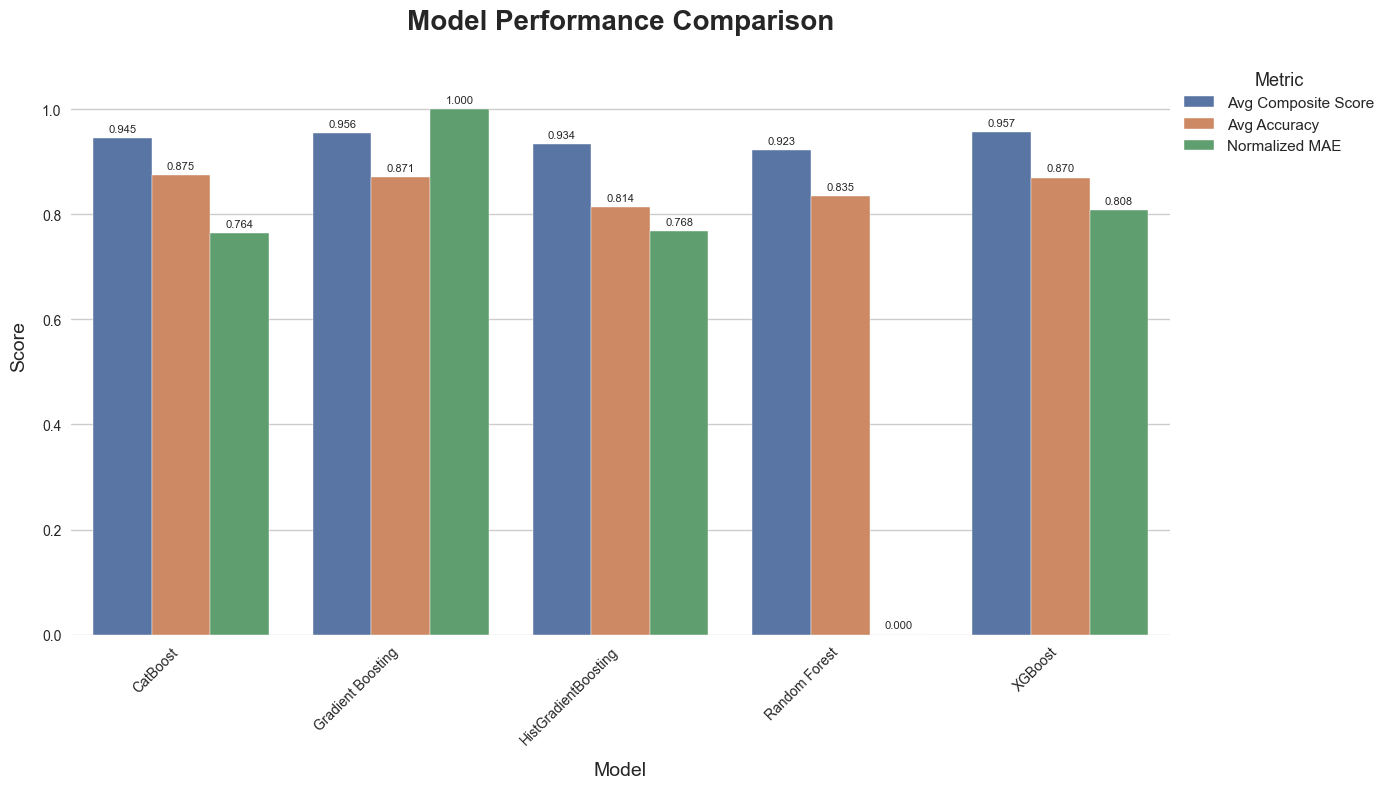

Model                CatBoost  Gradient Boosting  HistGradientBoosting  Random Forest   XGBoost
Avg Composite Score  0.945386           0.955501              0.934043       0.923082  0.956749
Avg Accuracy         0.875047           0.870950              0.813942       0.835291  0.869884
Normalized MAE       0.764000           1.000000              0.768000       0.000000  0.808000


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Recreate the DataFrame with the data
data = {
    'Model': ['CatBoost', 'Gradient Boosting', 'HistGradientBoosting', 'Random Forest', 'XGBoost'],
    'Avg Composite Score': [0.945386, 0.955501, 0.934043, 0.923082, 0.956749],
    'Avg Accuracy': [0.875047, 0.870950, 0.813942, 0.835291, 0.869884],
    'Normalized MAE': [0.764, 1.000, 0.768, 0.000, 0.808]  # Assuming these are the normalized values
}

df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_melted = df.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

# Set up the plot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create the grouped bar chart
chart = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='deep')

# Customize the chart
plt.title('Model Performance Comparison', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=14, labelpad=10)
plt.ylabel('Score', fontsize=14, labelpad=10)
plt.ylim(0, 1.1)  # Set y-axis limit

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on the bars
for container in chart.containers:
    chart.bar_label(container, fmt='%.3f', padding=3, fontsize=8)

# Adjust legend
plt.legend(title='Metric', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout and display
plt.tight_layout()
plt.savefig('model_performance_grouped_barchart.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print(df.set_index('Model').T.to_string())